# Set-up

In [1]:
# # Preamble

# ## Import colours

# In[1]:
# Lists of colors for plots

c0 = (0.76, 0.76, 0.76)
c1 = (1.00, 0.18, 0.33);
c2 = (1.00, 0.23, 0.19);
c3 = (1.00, 0.58, 0.00);
c4 = (1.00, 0.80, 0.00);
c5 = (0.30, 0.85, 0.39);
c6 = (0.35, 0.78, 0.98);
c7 = (0.20, 0.67, 0.86);
c8 = (0.00, 0.48, 1.00);
c9 = (0.35, 0.34, 0.84);
c10 = (0.00, 0.31, 0.57);
c11 = (0.12, 0.29, 0.69);
c12 = (0.17, 0.17, 0.42);
c13 = (1.00, 1.00, 1.00);
c14 = (0.77, 0.04, 0.00);

ios_colors=[c5, c1, c3, c7, c2, c6, c4, c9, c8]

def to_rgb_frac(vect):
    return (float(vect[0])/255, float(vect[1])/255, float(vect[2])/255)

color_list=list(map(to_rgb_frac, [(166,206,227),(178,223,138),(51,160,44),(31,120,180)]))

# Lists of colors for plots

def to_rgb_frac(vect):
    return (float(vect[0])/255, float(vect[1])/255, float(vect[2])/255)

rb_div_5=list(map(to_rgb_frac, [(202,0,32),
(244,165,130),
(247,247,247),
(146,197,222),
(5,113,176)]))

qualitative_10=list(map(to_rgb_frac, [(166,206,227),
(31,120,180),
(178,223,138),
(51,160,44),
(251,154,153),
(227,26,28),
(253,191,111),
(255,127,0),
(202,178,214),
(106,61,154)]))


# <img src="Qualitative_10.png">
# <img src="RB_DIV_5.png">



# ## Import packages

# In[2]:

#from __future__ import print_function
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets

# imported packages
get_ipython().run_line_magic('matplotlib', 'inline')
import datetime
import random
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import math
import matplotlib.ticker as plticker
import bisect
import copy
import json
import csv
import ast
import pylab as pl
import time
from scipy import integrate
from scipy.integrate import quad, dblquad
#import urllib2
#import io
#import os
#import re

# from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import interp1d
from scipy.special import expi
import time


[0.16492422502470644, 0.17857142857142858, 0.5773502691896258, 0.0, 0.0]
[0.20327890704543541, 0.37267799624996495, 0.0, 0.0, 0.0]
[0.01211224340957257, 0.016100120341531066, 0.016777327005364235, 0.05439282932204212, 0.07142857142857142]
[0.0, 0.0, 0.045454545454545456, 0.05263157894736842, 0.0]


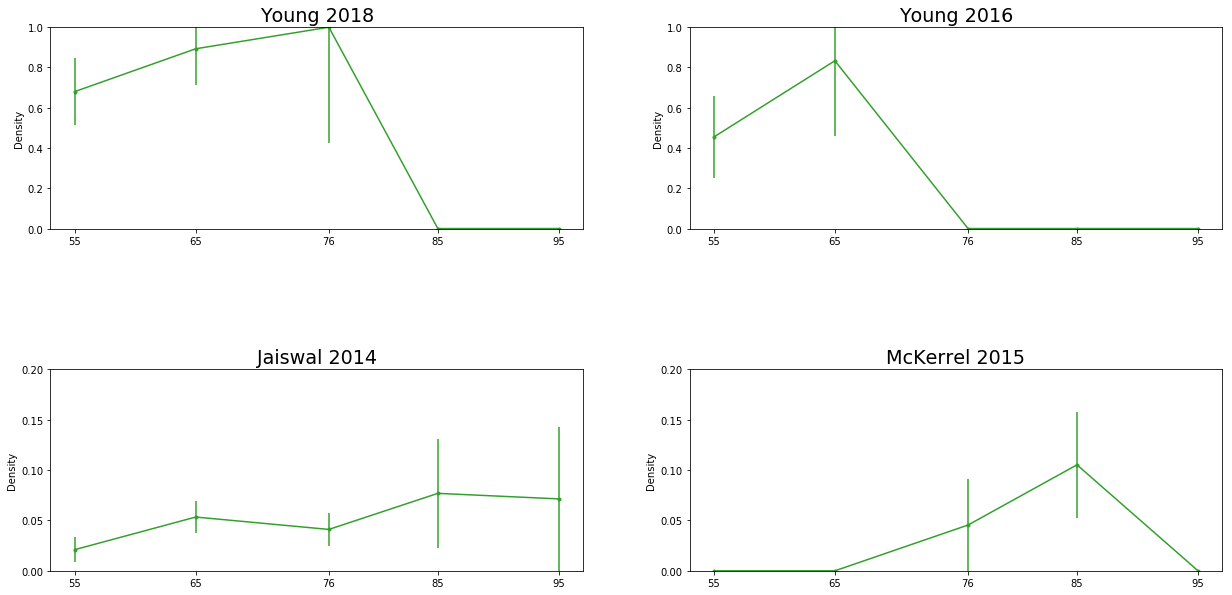

In [7]:
#rate of co-occurrence sorted by study
datafilename='all_studies_not_trimmed_all_genes_multiple_mutations.csv'

# Look at the 10 most commonly mutated genes
# • DNMT3A: all coding exons
# • TET2: all coding exons
# • ASXL1: exon 12
# • JAK2: exon 12 and 14
# • TP53: all coding exons
# • SF3B1: exons 13 - 16
# • SRSF2: exon 1
# • IDH2: exon 4
# • KRAS: exons 2 - 3
# • CBL: exons 8 - 9

target_study='Young 2018'
counts_less60_ppl_with_at_least_another_coexisting_mutation=0
counts_60_ppl_with_at_least_another_coexisting_mutation=0
counts_70_ppl_with_at_least_another_coexisting_mutation=0
counts_80_ppl_with_at_least_another_coexisting_mutation=0
counts_great90_ppl_with_at_least_another_coexisting_mutation=0
base_number_less60=0
base_number_60=0
base_number_70=0
base_number_80=0
base_number_great90=0

plt.close('all')
f, ax1 = plt.subplots(2, 2, figsize=(7*3,10))
plt.subplots_adjust(hspace = 0.7)  
font = {'weight' : 'normal','size'   : 16}
matplotlib.rc('font', **font)

linear_age=np.array(np.linspace(55,95,100)) 

with open(datafilename) as data:
    reader = csv.reader(data,delimiter=',')
    #reader = csv.DictReader(data)
    for row in reader:
        try:
            #cannot assign without elliciting IndexError 
            Participant_ID= row[1]
            age=float(row[2])
            number_of_mutations= float(row[3])
            

            if row[0] == target_study: 
            #or row[8] == subject_gene or row[12] == subject_gene  or row[16] == subject_gene\
            #or row[20] == subject_gene  or row[24] == subject_gene or row[28] == subject_gene or row[32] == subject_gene\
            #or row[36] == subject_gene or row[40] == subject_gene or row[44] == subject_gene or row[48] == subject_gene\
            #or row[52] == subject_gene or row[56] == subject_gene:
                if age<60:
                    base_number_less60=base_number_less60+1
                elif 60<=age<70:
                    base_number_60=base_number_60+1
                elif 70<=age<80:
                    base_number_70=base_number_70+1
                elif 80<=age<90:
                    base_number_80=base_number_80+1
                elif age>=90:
                    base_number_great90=base_number_great90+1
                else:
                    print('age is ', age)
                    
                if row[9]!='':
                    if age<60:
                        counts_less60_ppl_with_at_least_another_coexisting_mutation=counts_less60_ppl_with_at_least_another_coexisting_mutation+1
                    elif 60<=age<70:
                        counts_60_ppl_with_at_least_another_coexisting_mutation=counts_60_ppl_with_at_least_another_coexisting_mutation+1
                    elif 70<=age<80:
                        counts_70_ppl_with_at_least_another_coexisting_mutation=counts_70_ppl_with_at_least_another_coexisting_mutation+1
                    elif 80<=age<90:
                        counts_80_ppl_with_at_least_another_coexisting_mutation=counts_80_ppl_with_at_least_another_coexisting_mutation+1
                    elif age>=90:
                        counts_great90_ppl_with_at_least_another_coexisting_mutation=counts_great90_ppl_with_at_least_another_coexisting_mutation+1
                    else:
                        print('age is ', age)
                
                #counts_ppl_with_at_least_another_coexisting_mutation=counts_ppl_with_at_least_another_coexisting_mutation+1

 

                            
        except: # catch the error
                pass # pass will basically ignore it
         # and execution will continue on to whatever comes
         # after the try/except block
#        cc=cc+1
if base_number_less60==0:
    base_number_less60=1
if base_number_60==0:
    base_number_60=1
if base_number_70==0:
    base_number_70=1
if base_number_80==0:
    base_number_80=1
if base_number_great90==0:
    base_number_great90=1

    
#get the divided counts first   
Base_numbers=[base_number_less60, base_number_60, base_number_70, base_number_80, base_number_great90] 
counts=[counts_less60_ppl_with_at_least_another_coexisting_mutation,counts_60_ppl_with_at_least_another_coexisting_mutation,\
        counts_70_ppl_with_at_least_another_coexisting_mutation,counts_80_ppl_with_at_least_another_coexisting_mutation,\
        counts_great90_ppl_with_at_least_another_coexisting_mutation]
Divided_counts=[counts_less60_ppl_with_at_least_another_coexisting_mutation/base_number_less60, counts_60_ppl_with_at_least_another_coexisting_mutation/base_number_60,\
                counts_70_ppl_with_at_least_another_coexisting_mutation/base_number_70, counts_80_ppl_with_at_least_another_coexisting_mutation/base_number_80,\
                counts_great90_ppl_with_at_least_another_coexisting_mutation/base_number_great90]
timepoints=[55,65,76,85,95]




#this no longer affects the divided counts
#avoid dividing by 0
if counts[0]==0:
    counts[0]=1
if counts[1]==0:
    counts[1]=1
if counts[2]==0:
    counts[2]=1
if counts[3]==0:
    counts[3]=1
if counts[4]==0:
    counts[4]=1


Errors=[Divided_counts[0]/(counts[0])**0.5,Divided_counts[1]/(counts[1])**0.5,Divided_counts[2]/(counts[2])**0.5\
        ,Divided_counts[3]/(counts[3])**0.5,Divided_counts[4]/(counts[4])**0.5]




#ax1[1][1].scatter(timepoints,Divided_counts, alpha=1.0, color=qualitative_10[3],                marker='.', s=100)
ax1[0][0].errorbar(timepoints,Divided_counts, yerr=Errors, alpha=1.0, color=qualitative_10[3]  ,marker='.')
#ax1[0][0].plot([phi60 for i in range(100)], [10**(j/50 - 1) for j in range(100)], lw=2, linestyle = ':', color='k')
#ax1[0][0].set_yscale('log')
#ax1[0][0].set_xlabel('n')
ax1[0][0].set_ylabel('Density')
ax1[0][0].set_title('Young 2018')
#ax1[0][0].set_xlim(xmin, xmax)
ax1[0][0].set_ylim(0,1)                                                
ax1[0][0].set_xticks(timepoints);                                                                                            
ax1[0][0].set_xticklabels(timepoints);

#print(Base_numbers)    #number of ppl having the a mutation in the subject gene
#print(Divided_counts)   #number of ppl having more than just a mutation in the subject gene/Base numbers
print(Errors)
Errors=[]


target_study='Young 2016'
counts_less60_ppl_with_at_least_another_coexisting_mutation=0
counts_60_ppl_with_at_least_another_coexisting_mutation=0
counts_70_ppl_with_at_least_another_coexisting_mutation=0
counts_80_ppl_with_at_least_another_coexisting_mutation=0
counts_great90_ppl_with_at_least_another_coexisting_mutation=0
base_number_less60=0
base_number_60=0
base_number_70=0
base_number_80=0
base_number_great90=0



with open(datafilename) as data:
    reader = csv.reader(data,delimiter=',')
    #reader = csv.DictReader(data)
    for row in reader:
        try:
            #cannot assign without elliciting IndexError 
            Participant_ID= row[1]
            age=float(row[2])
            number_of_mutations= float(row[3])
            

            if row[0] == target_study: 
            #or row[8] == subject_gene or row[12] == subject_gene  or row[16] == subject_gene\
            #or row[20] == subject_gene  or row[24] == subject_gene or row[28] == subject_gene or row[32] == subject_gene\
           # or row[36] == subject_gene or row[40] == subject_gene or row[44] == subject_gene or row[48] == subject_gene\
           # or row[52] == subject_gene or row[56] == subject_gene:
                if age<60:
                    base_number_less60=base_number_less60+1
                elif 60<=age<70:
                    base_number_60=base_number_60+1
                elif 70<=age<80:
                    base_number_70=base_number_70+1
                elif 80<=age<90:
                    base_number_80=base_number_80+1
                elif age>=90:
                    base_number_great90=base_number_great90+1
                else:
                    print('age is ', age)
                    
                if row[9]!='':
                    if age<60:
                        counts_less60_ppl_with_at_least_another_coexisting_mutation=counts_less60_ppl_with_at_least_another_coexisting_mutation+1
                    elif 60<=age<70:
                        counts_60_ppl_with_at_least_another_coexisting_mutation=counts_60_ppl_with_at_least_another_coexisting_mutation+1
                    elif 70<=age<80:
                        counts_70_ppl_with_at_least_another_coexisting_mutation=counts_70_ppl_with_at_least_another_coexisting_mutation+1
                    elif 80<=age<90:
                        counts_80_ppl_with_at_least_another_coexisting_mutation=counts_80_ppl_with_at_least_another_coexisting_mutation+1
                    elif age>=90:
                        counts_great90_ppl_with_at_least_another_coexisting_mutation=counts_great90_ppl_with_at_least_another_coexisting_mutation+1
                    else:
                        print('age is ', age)
                
                #counts_ppl_with_at_least_another_coexisting_mutation=counts_ppl_with_at_least_another_coexisting_mutation+1

 

                            
        except: # catch the error
                pass # pass will basically ignore it
         # and execution will continue on to whatever comes
         # after the try/except block
#        cc=cc+1
#this avoids dividing by 0
if base_number_less60==0:
    base_number_less60=1
if base_number_60==0:
    base_number_60=1
if base_number_70==0:
    base_number_70=1
if base_number_80==0:
    base_number_80=1
if base_number_great90==0:
    base_number_great90=1

    
    
#get the divided counts first   
Base_numbers=[base_number_less60, base_number_60, base_number_70, base_number_80, base_number_great90] 
counts=[counts_less60_ppl_with_at_least_another_coexisting_mutation,counts_60_ppl_with_at_least_another_coexisting_mutation,\
        counts_70_ppl_with_at_least_another_coexisting_mutation,counts_80_ppl_with_at_least_another_coexisting_mutation,\
        counts_great90_ppl_with_at_least_another_coexisting_mutation]
Divided_counts=[counts_less60_ppl_with_at_least_another_coexisting_mutation/base_number_less60, counts_60_ppl_with_at_least_another_coexisting_mutation/base_number_60,\
                counts_70_ppl_with_at_least_another_coexisting_mutation/base_number_70, counts_80_ppl_with_at_least_another_coexisting_mutation/base_number_80,\
                counts_great90_ppl_with_at_least_another_coexisting_mutation/base_number_great90]
timepoints=[55,65,76,85,95]




#this no longer affects the divided counts
#avoid dividing by 0
if counts[0]==0:
    counts[0]=1
if counts[1]==0:
    counts[1]=1
if counts[2]==0:
    counts[2]=1
if counts[3]==0:
    counts[3]=1
if counts[4]==0:
    counts[4]=1


Errors=[Divided_counts[0]/(counts[0])**0.5,Divided_counts[1]/(counts[1])**0.5,Divided_counts[2]/(counts[2])**0.5\
        ,Divided_counts[3]/(counts[3])**0.5,Divided_counts[4]/(counts[4])**0.5]



#ax1[1][1].scatter(timepoints,Divided_counts, alpha=1.0, color=qualitative_10[3],                marker='.', s=100)
ax1[0][1].errorbar(timepoints,Divided_counts, yerr=Errors, alpha=1.0, color=qualitative_10[3]  ,marker='.')
#ax1[0][0].plot([phi60 for i in range(100)], [10**(j/50 - 1) for j in range(100)], lw=2, linestyle = ':', color='k')
#ax1[0][0].set_yscale('log')
#ax1[0][0].set_xlabel('n')
ax1[0][1].set_ylabel('Density')
ax1[0][1].set_title('Young 2016')
#ax1[0][0].set_xlim(xmin, xmax)
ax1[0][1].set_ylim(0,1)                                                
ax1[0][1].set_xticks(timepoints);                                                                                            
ax1[0][1].set_xticklabels(timepoints);

#print(Divided_counts)
print(Errors)
Errors=[]

target_study='Jaiswal 2014'
counts_less60_ppl_with_at_least_another_coexisting_mutation=0
counts_60_ppl_with_at_least_another_coexisting_mutation=0
counts_70_ppl_with_at_least_another_coexisting_mutation=0
counts_80_ppl_with_at_least_another_coexisting_mutation=0
counts_great90_ppl_with_at_least_another_coexisting_mutation=0
base_number_less60=0
base_number_60=0
base_number_70=0
base_number_80=0
base_number_great90=0


with open(datafilename) as data:
    reader = csv.reader(data,delimiter=',')
    #reader = csv.DictReader(data)
    for row in reader:
        try:
            #cannot assign without elliciting IndexError 
            Participant_ID= row[1]
            age=float(row[2])
            number_of_mutations= float(row[3])
            

            if row[0] == target_study:
#             or row[8] == subject_gene or row[12] == subject_gene  or row[16] == subject_gene\
#             or row[20] == subject_gene  or row[24] == subject_gene or row[28] == subject_gene or row[32] == subject_gene\
#             or row[36] == subject_gene or row[40] == subject_gene or row[44] == subject_gene or row[48] == subject_gene\
#             or row[52] == subject_gene or row[56] == subject_gene:
                if age<60:
                    base_number_less60=base_number_less60+1
                elif 60<=age<70:
                    base_number_60=base_number_60+1
                elif 70<=age<80:
                    base_number_70=base_number_70+1
                elif 80<=age<90:
                    base_number_80=base_number_80+1
                elif age>=90:
                    base_number_great90=base_number_great90+1
                else:
                    print('age is ', age)
                    
                if row[9]!='':
                    if age<60:
                        counts_less60_ppl_with_at_least_another_coexisting_mutation=counts_less60_ppl_with_at_least_another_coexisting_mutation+1
                    elif 60<=age<70:
                        counts_60_ppl_with_at_least_another_coexisting_mutation=counts_60_ppl_with_at_least_another_coexisting_mutation+1
                    elif 70<=age<80:
                        counts_70_ppl_with_at_least_another_coexisting_mutation=counts_70_ppl_with_at_least_another_coexisting_mutation+1
                    elif 80<=age<90:
                        counts_80_ppl_with_at_least_another_coexisting_mutation=counts_80_ppl_with_at_least_another_coexisting_mutation+1
                    elif age>=90:
                        counts_great90_ppl_with_at_least_another_coexisting_mutation=counts_great90_ppl_with_at_least_another_coexisting_mutation+1
                    else:
                        print('age is ', age)
                
                #counts_ppl_with_at_least_another_coexisting_mutation=counts_ppl_with_at_least_another_coexisting_mutation+1

 

                            
        except: # catch the error
                pass # pass will basically ignore it
         # and execution will continue on to whatever comes
         # after the try/except block
#        cc=cc+1
#avoid dividing by 0
if base_number_less60==0:
    base_number_less60=1
if base_number_60==0:
    base_number_60=1
if base_number_70==0:
    base_number_70=1
if base_number_80==0:
    base_number_80=1
if base_number_great90==0:
    base_number_great90=1

    
#get the divided counts first   
Base_numbers=[base_number_less60, base_number_60, base_number_70, base_number_80, base_number_great90] 
counts=[counts_less60_ppl_with_at_least_another_coexisting_mutation,counts_60_ppl_with_at_least_another_coexisting_mutation,\
        counts_70_ppl_with_at_least_another_coexisting_mutation,counts_80_ppl_with_at_least_another_coexisting_mutation,\
        counts_great90_ppl_with_at_least_another_coexisting_mutation]
Divided_counts=[counts_less60_ppl_with_at_least_another_coexisting_mutation/base_number_less60, counts_60_ppl_with_at_least_another_coexisting_mutation/base_number_60,\
                counts_70_ppl_with_at_least_another_coexisting_mutation/base_number_70, counts_80_ppl_with_at_least_another_coexisting_mutation/base_number_80,\
                counts_great90_ppl_with_at_least_another_coexisting_mutation/base_number_great90]
timepoints=[55,65,76,85,95]




#this no longer affects the divided counts
#avoid dividing by 0
if counts[0]==0:
    counts[0]=1
if counts[1]==0:
    counts[1]=1
if counts[2]==0:
    counts[2]=1
if counts[3]==0:
    counts[3]=1
if counts[4]==0:
    counts[4]=1


Errors=[Divided_counts[0]/(counts[0])**0.5,Divided_counts[1]/(counts[1])**0.5,Divided_counts[2]/(counts[2])**0.5\
        ,Divided_counts[3]/(counts[3])**0.5,Divided_counts[4]/(counts[4])**0.5]





#ax1[1][1].scatter(timepoints,Divided_counts, alpha=1.0, color=qualitative_10[3],                marker='.', s=100)
ax1[1][0].errorbar(timepoints,Divided_counts, yerr=Errors, alpha=1.0, color=qualitative_10[3]  ,marker='.')
#ax1[0][0].plot([phi60 for i in range(100)], [10**(j/50 - 1) for j in range(100)], lw=2, linestyle = ':', color='k')
#ax1[0][0].set_yscale('log')
#ax1[0][0].set_xlabel('n')
ax1[1][0].set_ylabel('Density')
ax1[1][0].set_title('Jaiswal 2014')
#ax1[0][0].set_xlim(xmin, xmax)
ax1[1][0].set_ylim(0,0.2)                                                  
ax1[1][0].set_xticks(timepoints);                                                                                            
ax1[1][0].set_xticklabels(timepoints);

#print(Divided_counts)
print(Errors)
Errors=[]




target_study='McKerrel 2015'


counts_less60_ppl_with_at_least_another_coexisting_mutation=0
counts_60_ppl_with_at_least_another_coexisting_mutation=0
counts_70_ppl_with_at_least_another_coexisting_mutation=0
counts_80_ppl_with_at_least_another_coexisting_mutation=0
counts_great90_ppl_with_at_least_another_coexisting_mutation=0
base_number_less60=0
base_number_60=0
base_number_70=0
base_number_80=0
base_number_great90=0



with open(datafilename) as data:
    reader = csv.reader(data,delimiter=',')
    #reader = csv.DictReader(data)
    for row in reader:
        try:
            #cannot assign without elliciting IndexError 
            Participant_ID= row[1]
            age=float(row[2])
            number_of_mutations= float(row[3])
            

            if row[0] == target_study:
#             or row[8] == subject_gene or row[12] == subject_gene  or row[16] == subject_gene\
#             or row[20] == subject_gene  or row[24] == subject_gene or row[28] == subject_gene or row[32] == subject_gene\
#             or row[36] == subject_gene or row[40] == subject_gene or row[44] == subject_gene or row[48] == subject_gene\
#             or row[52] == subject_gene or row[56] == subject_gene:
                if age<60:
                    base_number_less60=base_number_less60+1
                elif 60<=age<70:
                    base_number_60=base_number_60+1
                elif 70<=age<80:
                    base_number_70=base_number_70+1
                elif 80<=age<90:
                    base_number_80=base_number_80+1
                elif age>=90:
                    base_number_great90=base_number_great90+1
                else:
                    print('age is ', age)
                    
                if row[9]!='':
                    if age<60:
                        counts_less60_ppl_with_at_least_another_coexisting_mutation=counts_less60_ppl_with_at_least_another_coexisting_mutation+1
                    elif 60<=age<70:
                        counts_60_ppl_with_at_least_another_coexisting_mutation=counts_60_ppl_with_at_least_another_coexisting_mutation+1
                    elif 70<=age<80:
                        counts_70_ppl_with_at_least_another_coexisting_mutation=counts_70_ppl_with_at_least_another_coexisting_mutation+1
                    elif 80<=age<90:
                        counts_80_ppl_with_at_least_another_coexisting_mutation=counts_80_ppl_with_at_least_another_coexisting_mutation+1
                    elif age>=90:
                        counts_great90_ppl_with_at_least_another_coexisting_mutation=counts_great90_ppl_with_at_least_another_coexisting_mutation+1
                    else:
                        print('age is ', age)
                
                #counts_ppl_with_at_least_another_coexisting_mutation=counts_ppl_with_at_least_another_coexisting_mutation+1

 

                            
        except: # catch the error
                pass # pass will basically ignore it
         # and execution will continue on to whatever comes
         # after the try/except block
#        cc=cc+1
#avoid dividing by 0
if base_number_less60==0:
    base_number_less60=1
if base_number_60==0:
    base_number_60=1
if base_number_70==0:
    base_number_70=1
if base_number_80==0:
    base_number_80=1
if base_number_great90==0:
    base_number_great90=1

    
#get the divided counts first   
Base_numbers=[base_number_less60, base_number_60, base_number_70, base_number_80, base_number_great90] 
counts=[counts_less60_ppl_with_at_least_another_coexisting_mutation,counts_60_ppl_with_at_least_another_coexisting_mutation,\
        counts_70_ppl_with_at_least_another_coexisting_mutation,counts_80_ppl_with_at_least_another_coexisting_mutation,\
        counts_great90_ppl_with_at_least_another_coexisting_mutation]
Divided_counts=[counts_less60_ppl_with_at_least_another_coexisting_mutation/base_number_less60, counts_60_ppl_with_at_least_another_coexisting_mutation/base_number_60,\
                counts_70_ppl_with_at_least_another_coexisting_mutation/base_number_70, counts_80_ppl_with_at_least_another_coexisting_mutation/base_number_80,\
                counts_great90_ppl_with_at_least_another_coexisting_mutation/base_number_great90]
timepoints=[55,65,76,85,95]




#this no longer affects the divided counts
#avoid dividing by 0
if counts[0]==0:
    counts[0]=1
if counts[1]==0:
    counts[1]=1
if counts[2]==0:
    counts[2]=1
if counts[3]==0:
    counts[3]=1
if counts[4]==0:
    counts[4]=1



Errors=[Divided_counts[0]/(counts[0])**0.5,Divided_counts[1]/(counts[1])**0.5,Divided_counts[2]/(counts[2])**0.5\
        ,Divided_counts[3]/(counts[3])**0.5,Divided_counts[4]/(counts[4])**0.5]

density_theory=[(det_lim*t) for t in linear_age]




#ax1[1][1].scatter(timepoints,Divided_counts, alpha=1.0, color=qualitative_10[3],                marker='.', s=100)
ax1[1][1].errorbar(timepoints,Divided_counts, yerr=Errors, alpha=1.0, color=qualitative_10[3]  ,marker='.')
ax1[1][1].plot(linear_age, density_theory, lw=2, color='k')
#ax1[0][0].set_yscale('log')
#ax1[0][0].set_xlabel('n')
ax1[1][1].set_ylabel('Density')
ax1[1][1].set_title('McKerrel 2015')
#ax1[0][0].set_xlim(xmin, xmax)
ax1[1][1].set_ylim(0,0.2)                                                  
ax1[1][1].set_xticks(timepoints);                                                                                            
ax1[1][1].set_xticklabels(timepoints);

#print(Divided_counts)
print(Errors)
Errors=[]







#plt.savefig('conditional_probability_of_coexisting_mutations_by_gene.pdf')

Total participant number is  17182
[0.00018309205154005045, 0.000663059734177409, 0.0010649955403405124, 0.004461241521681688, 0.009708737864077669]


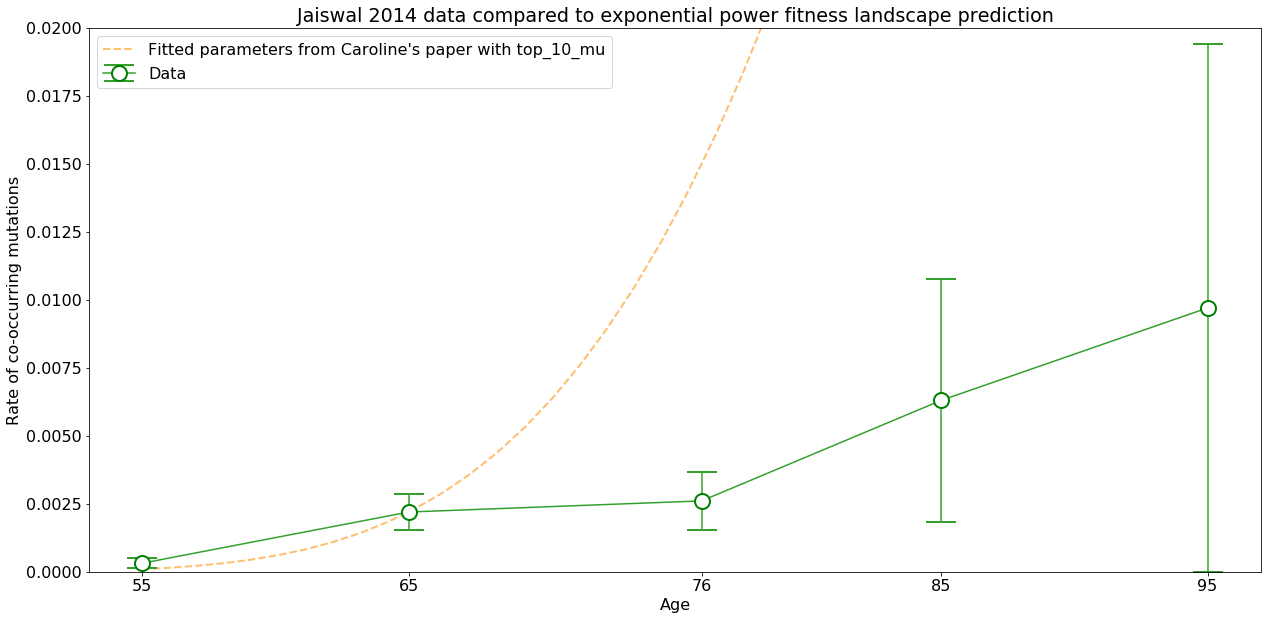

In [5]:
#rate of co-occurrence based on EXPONENTIAL POWER DISTRIBUTION

datafilename='all_studies_not_trimmed_all_genes_multiple_mutations.csv'
age_data='Jaiswal_age_data.csv'

target_study='Jaiswal 2014'
VAF_lim= 0.0556
pop_size=10**5
top_4_u=10**-6
pseudo_infinity=10**8
u=top_4_u
det_lim= VAF_lim*2
n_min=pop_size*det_lim
n_max=pseudo_infinity

b = 1.50725533e-01
d = 8.98941675e-09
s_max = 1.47963832e-01
s_peak=0
top_10_mu = 7.1039709e-05
u= top_10_mu
pop_size=9.39358404e+04


def nu(t,u): 
    #normalized_rho_s= lambda s: (1.0/normalization[0])*np.exp(-((abs(s-s_peak))/d)**b)
    before_wrt_n= lambda n, s: pop_size*u*((1.0/normalization[0])*np.exp(-((abs(s-s_peak))/d)**b))/n*np.exp(-n/((np.exp(s*t)-1)/s))
    before_wrt_l_log= lambda l, s: pop_size*u*np.exp(l)*((1.0/normalization[0])*np.exp(-((abs(s-s_peak))/d)**b))/np.exp(l)*np.exp(-np.exp(l)/((np.exp(s*t)-1)/s))
    #nu = integrate.dblquad(before_wrt_n, n_min, n_min*4, lambda s: 0, lambda s: s_max)[0]
    nu = integrate.dblquad(before_wrt_l_log, 0, s_max, lambda s: np.log(n_min), lambda s: np.log(n_max))[0]
    return nu


counts_less60_ppl_with_at_least_another_coexisting_mutation=0
counts_60_ppl_with_at_least_another_coexisting_mutation=0
counts_70_ppl_with_at_least_another_coexisting_mutation=0
counts_80_ppl_with_at_least_another_coexisting_mutation=0
counts_great90_ppl_with_at_least_another_coexisting_mutation=0

base_number_less60=0
base_number_60=0
base_number_70=0
base_number_80=0
base_number_great90=0



with open(datafilename) as data:
    reader = csv.reader(data,delimiter=',')
    #reader = csv.DictReader(data)
    for row in reader:
        try:
            #cannot assign without elliciting IndexError 
            Participant_ID= row[1]
            age=float(row[2])
            number_of_mutations= float(row[3])
            

            if row[0] == target_study:
                if row[9]!='':
                    if age<60:
                        counts_less60_ppl_with_at_least_another_coexisting_mutation=counts_less60_ppl_with_at_least_another_coexisting_mutation+1
                    elif 60<=age<70:
                        counts_60_ppl_with_at_least_another_coexisting_mutation=counts_60_ppl_with_at_least_another_coexisting_mutation+1
                    elif 70<=age<80:
                        counts_70_ppl_with_at_least_another_coexisting_mutation=counts_70_ppl_with_at_least_another_coexisting_mutation+1
                    elif 80<=age<90:
                        counts_80_ppl_with_at_least_another_coexisting_mutation=counts_80_ppl_with_at_least_another_coexisting_mutation+1
                    elif age>=90:
                        counts_great90_ppl_with_at_least_another_coexisting_mutation=counts_great90_ppl_with_at_least_another_coexisting_mutation+1
                    else:
                        print('age is ', age)
                                         
        except: # catch the error
                pass # pass will basically ignore it
         # and execution will continue on to whatever comes
         # after the try/except block
#        cc=cc+1



with open(age_data) as data:
    reader = csv.reader(data,delimiter=',')
    #reader = csv.DictReader(data)
    for row in reader:
        try:
            age=float(row[0])
            if age != 0:
                if age<60:
                    base_number_less60=base_number_less60+1
                elif 60<=age<70:
                    base_number_60=base_number_60+1
                elif 70<=age<80:
                    base_number_70=base_number_70+1
                elif 80<=age<90:
                    base_number_80=base_number_80+1
                elif age>=90:
                    base_number_great90=base_number_great90+1
        except:
            pass

                    
print('Total participant number is ', (base_number_less60+base_number_60+base_number_70+base_number_80+base_number_great90) )
                    
#avoid dividing by 0
if base_number_less60==0:
    base_number_less60=1
if base_number_60==0:
    base_number_60=1
if base_number_70==0:
    base_number_70=1
if base_number_80==0:
    base_number_80=1
if base_number_great90==0:
    base_number_great90=1

    
#get the divided counts first   
Base_numbers=[base_number_less60, base_number_60, base_number_70, base_number_80, base_number_great90] 
counts=[counts_less60_ppl_with_at_least_another_coexisting_mutation,counts_60_ppl_with_at_least_another_coexisting_mutation,\
        counts_70_ppl_with_at_least_another_coexisting_mutation,counts_80_ppl_with_at_least_another_coexisting_mutation,\
        counts_great90_ppl_with_at_least_another_coexisting_mutation]
Divided_counts=[counts_less60_ppl_with_at_least_another_coexisting_mutation/base_number_less60, counts_60_ppl_with_at_least_another_coexisting_mutation/base_number_60,\
                counts_70_ppl_with_at_least_another_coexisting_mutation/base_number_70, counts_80_ppl_with_at_least_another_coexisting_mutation/base_number_80,\
                counts_great90_ppl_with_at_least_another_coexisting_mutation/base_number_great90]
timepoints=[55,65,76,85,95]




#this no longer affects the divided counts
#avoid dividing by 0
if counts[0]==0:
    counts[0]=1
if counts[1]==0:
    counts[1]=1
if counts[2]==0:
    counts[2]=1
if counts[3]==0:
    counts[3]=1
if counts[4]==0:
    counts[4]=1



Errors=[Divided_counts[0]/(counts[0])**0.5,Divided_counts[1]/(counts[1])**0.5,Divided_counts[2]/(counts[2])**0.5\
        ,Divided_counts[3]/(counts[3])**0.5,Divided_counts[4]/(counts[4])**0.5]




plt.close('all')
f, ax1 = plt.subplots(1, 1, figsize=(7*3,10))
plt.subplots_adjust(hspace = 0.7)  
font = {'weight' : 'normal','size'   : 16}
matplotlib.rc('font', **font)


#average_number_of_ben_mutations = pop_size*u*(expi(-pop_size/((np.exp(s*t)-1)/s))-expi(-pop_size*det_lim/((np.exp(s*t)-1)/s)))    #in an individual

u=top_10_mu
linear_age=np.array(np.linspace(55,95,(95-55))) 
weight_s= lambda s: np.exp(-((abs(s-s_peak))/d)**b)
normalization=integrate.quad(weight_s, 0.0, s_max)
density_theory=[(1-np.exp(-nu(t,u))-(nu(t,u))*(np.exp(-nu(t,u)))) for t in linear_age]
ax1.plot(linear_age, density_theory, lw=2, linestyle='dashed', color=qualitative_10[6], label='Fitted parameters from Caroline\'s paper with top_10_mu')

u=1.54*10**-6
linear_age=np.array(np.linspace(55,95,(95-55))) 
weight_s= lambda s: np.exp(-((abs(s-s_peak))/d)**b)
normalization=integrate.quad(weight_s, 0.0, s_max)
#density_theory=[(1-np.exp(-nu(t,u))-(nu(t,u))*(np.exp(-nu(t,u)))) for t in linear_age]
#ax1.plot(linear_age, density_theory, lw=2, linestyle='dashed', color=qualitative_10[7], label='Fitted parameters from Caroline\'s paper: only DNMT3A')



#ax1[1][1].scatter(timepoints,Divided_counts, alpha=1.0, color=qualitative_10[3],                marker='.', s=100)
ax1.errorbar(timepoints,Divided_counts, yerr=Errors, alpha=1.0, color=qualitative_10[3],  marker='o' ,
         mec='green', mfc='white', ms=15, capsize=15, mew=2, label='Data' )
#ax1.plot(linear_age, density_theory, lw=2, color='k', label='s=0.05')

#ax1[0][0].set_yscale('log')
ax1.set_xlabel('Age')
ax1.set_ylabel('Rate of co-occurring mutations')
ax1.set_title('Jaiswal 2014 data compared to exponential power fitness landscape prediction')
ax1.legend()
#ax1[0][0].set_xlim(xmin, xmax)
ax1.set_ylim(0,0.02)                                                  
ax1.set_xticks(timepoints);                                                                                            
ax1.set_xticklabels(timepoints);

#print(Divided_counts)
print(Errors)
Errors=[]











#plt.savefig('Rate_of_coexisting_mutations_Jaiswal_fitted_parameter.pdf', bbox_inches='tight')

Total participant number is  17182


NameError: name 't' is not defined

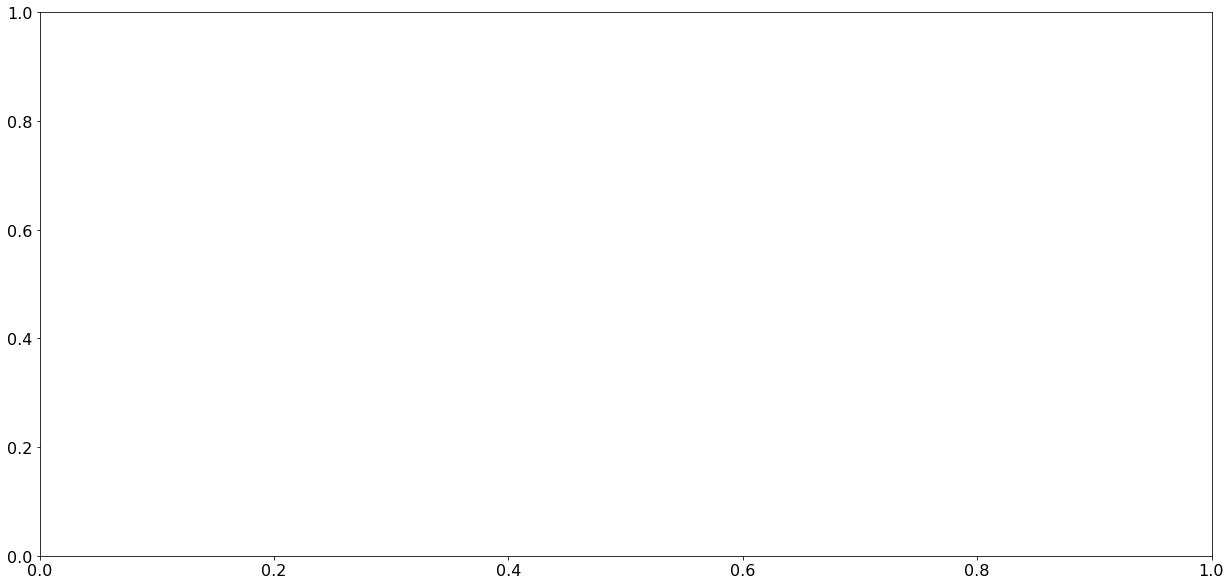

In [9]:
#rate of co-occurrence using single-valued s

datafilename='all_studies_not_trimmed_all_genes_multiple_mutations.csv'
age_data='Jaiswal_age_data.csv'

target_study='Jaiswal 2014'
det_lim= 0.0556
pop_size=10**5
top_4_u=10**-6
u=top_4_u
#s=0.05
linear_age=np.array(np.linspace(55,95,100)) 

counts_less60_ppl_with_at_least_another_coexisting_mutation=0
counts_60_ppl_with_at_least_another_coexisting_mutation=0
counts_70_ppl_with_at_least_another_coexisting_mutation=0
counts_80_ppl_with_at_least_another_coexisting_mutation=0
counts_great90_ppl_with_at_least_another_coexisting_mutation=0

base_number_less60=0
base_number_60=0
base_number_70=0
base_number_80=0
base_number_great90=0



with open(datafilename) as data:
    reader = csv.reader(data,delimiter=',')
    #reader = csv.DictReader(data)
    for row in reader:
        try:
            #cannot assign without elliciting IndexError 
            Participant_ID= row[1]
            age=float(row[2])
            number_of_mutations= float(row[3])
            

            if row[0] == target_study:
                if row[9]!='':
                    if age<60:
                        counts_less60_ppl_with_at_least_another_coexisting_mutation=counts_less60_ppl_with_at_least_another_coexisting_mutation+1
                    elif 60<=age<70:
                        counts_60_ppl_with_at_least_another_coexisting_mutation=counts_60_ppl_with_at_least_another_coexisting_mutation+1
                    elif 70<=age<80:
                        counts_70_ppl_with_at_least_another_coexisting_mutation=counts_70_ppl_with_at_least_another_coexisting_mutation+1
                    elif 80<=age<90:
                        counts_80_ppl_with_at_least_another_coexisting_mutation=counts_80_ppl_with_at_least_another_coexisting_mutation+1
                    elif age>=90:
                        counts_great90_ppl_with_at_least_another_coexisting_mutation=counts_great90_ppl_with_at_least_another_coexisting_mutation+1
                    else:
                        print('age is ', age)
                                         
        except: # catch the error
                pass # pass will basically ignore it
         # and execution will continue on to whatever comes
         # after the try/except block
#        cc=cc+1



with open(age_data) as data:
    reader = csv.reader(data,delimiter=',')
    #reader = csv.DictReader(data)
    for row in reader:
        try:
            age=float(row[0])
            if age != 0:
                if age<60:
                    base_number_less60=base_number_less60+1
                elif 60<=age<70:
                    base_number_60=base_number_60+1
                elif 70<=age<80:
                    base_number_70=base_number_70+1
                elif 80<=age<90:
                    base_number_80=base_number_80+1
                elif age>=90:
                    base_number_great90=base_number_great90+1
        except:
            pass

                    
print('Total participant number is ', (base_number_less60+base_number_60+base_number_70+base_number_80+base_number_great90) )
                    
#avoid dividing by 0
if base_number_less60==0:
    base_number_less60=1
if base_number_60==0:
    base_number_60=1
if base_number_70==0:
    base_number_70=1
if base_number_80==0:
    base_number_80=1
if base_number_great90==0:
    base_number_great90=1

    
#get the divided counts first   
Base_numbers=[base_number_less60, base_number_60, base_number_70, base_number_80, base_number_great90] 
counts=[counts_less60_ppl_with_at_least_another_coexisting_mutation,counts_60_ppl_with_at_least_another_coexisting_mutation,\
        counts_70_ppl_with_at_least_another_coexisting_mutation,counts_80_ppl_with_at_least_another_coexisting_mutation,\
        counts_great90_ppl_with_at_least_another_coexisting_mutation]
Divided_counts=[counts_less60_ppl_with_at_least_another_coexisting_mutation/base_number_less60, counts_60_ppl_with_at_least_another_coexisting_mutation/base_number_60,\
                counts_70_ppl_with_at_least_another_coexisting_mutation/base_number_70, counts_80_ppl_with_at_least_another_coexisting_mutation/base_number_80,\
                counts_great90_ppl_with_at_least_another_coexisting_mutation/base_number_great90]
timepoints=[55,65,76,85,95]




#this no longer affects the divided counts
#avoid dividing by 0
if counts[0]==0:
    counts[0]=1
if counts[1]==0:
    counts[1]=1
if counts[2]==0:
    counts[2]=1
if counts[3]==0:
    counts[3]=1
if counts[4]==0:
    counts[4]=1



Errors=[Divided_counts[0]/(counts[0])**0.5,Divided_counts[1]/(counts[1])**0.5,Divided_counts[2]/(counts[2])**0.5\
        ,Divided_counts[3]/(counts[3])**0.5,Divided_counts[4]/(counts[4])**0.5]

density_theory=[(det_lim*t) for t in linear_age]


plt.close('all')
f, ax1 = plt.subplots(1, 1, figsize=(7*3,10))
plt.subplots_adjust(hspace = 0.7)  
font = {'weight' : 'normal','size'   : 16}
matplotlib.rc('font', **font)


#linear_age=np.array(np.linspace(55,95,(95-55))) 

#average_number_of_ben_mutations = pop_size*u*(expi(-pop_size/((np.exp(s*t)-1)/s))-expi(-pop_size*det_lim/((np.exp(s*t)-1)/s)))    #in an individual

s=0.08
mu=np.exp(-pop_size*u*(expi(-pop_size/((np.exp(s*t)-1)/s))-expi(-pop_size*det_lim/((np.exp(s*t)-1)/s))) )   
density_theory=[(1-np.exp(-pop_size*u*(expi(-pop_size/((np.exp(s*t)-1)/s))-expi(-pop_size*det_lim/((np.exp(s*t)-1)/s)))    )\
                -pop_size*u*(expi(-pop_size/((np.exp(s*t)-1)/s))-expi(-pop_size*det_lim/((np.exp(s*t)-1)/s)))*\
                 np.exp(-pop_size*u*(expi(-pop_size/((np.exp(s*t)-1)/s))-expi(-pop_size*det_lim/((np.exp(s*t)-1)/s)))    )) for t in linear_age]
ax1.plot(linear_age, density_theory, lw=2, linestyle='dashed', color=qualitative_10[6], label='s=0.08')

s=0.1
density_theory=[(1-np.exp(-pop_size*u*(expi(-pop_size/((np.exp(s*t)-1)/s))-expi(-pop_size*det_lim/((np.exp(s*t)-1)/s)))    )\
                -pop_size*u*(expi(-pop_size/((np.exp(s*t)-1)/s))-expi(-pop_size*det_lim/((np.exp(s*t)-1)/s)))*\
                 np.exp(-pop_size*u*(expi(-pop_size/((np.exp(s*t)-1)/s))-expi(-pop_size*det_lim/((np.exp(s*t)-1)/s)))    )) for t in linear_age]
ax1.plot(linear_age, density_theory, lw=2, linestyle='dashed', color=qualitative_10[4], label='s=0.10')

s=0.12
density_theory=[(1-np.exp(-pop_size*u*(expi(-pop_size/((np.exp(s*t)-1)/s))-expi(-pop_size*det_lim/((np.exp(s*t)-1)/s)))    )\
                -pop_size*u*(expi(-pop_size/((np.exp(s*t)-1)/s))-expi(-pop_size*det_lim/((np.exp(s*t)-1)/s)))*\
                 np.exp(-pop_size*u*(expi(-pop_size/((np.exp(s*t)-1)/s))-expi(-pop_size*det_lim/((np.exp(s*t)-1)/s)))    )) for t in linear_age]
ax1.plot(linear_age, density_theory, lw=2, linestyle='dashed', color=qualitative_10[5], label='s=0.12')


#ax1[1][1].scatter(timepoints,Divided_counts, alpha=1.0, color=qualitative_10[3],                marker='.', s=100)
ax1.errorbar(timepoints,Divided_counts, yerr=Errors, alpha=1.0, color=qualitative_10[3], marker='.' , label='Data' )
#ax1.plot(linear_age, density_theory, lw=2, color='k', label='s=0.05')

#ax1[0][0].set_yscale('log')
ax1.set_xlabel('Age')
ax1.set_ylabel('Rate of co-occurring mutations')
ax1.set_title('Jaiswal 2014')
ax1.legend()
#ax1[0][0].set_xlim(xmin, xmax)
ax1.set_ylim(0,0.02)                                                  
ax1.set_xticks(timepoints);                                                                                            
ax1.set_xticklabels(timepoints);

#print(Divided_counts)
print(Errors)
Errors=[]





In [ ]:
from scipy.special import expi

In [ ]:
mu


In [ ]:
test=[nu(t) for t in linear_age]
test

In [ ]:
#EXPONENTIAL POWER DISTRIBUTION plot
s_max=0.145
expo_power_dist= lambda s: ((1.0/normalization[0])*np.exp(-((abs(s-s_peak))/d)**b))
linear_s=np.linspace(0,s_max,100)
plt.plot(linear_s,[u*expo_power_dist(s1) for s1 in linear_s])

In [ ]:
t=5
1-np.exp(-nu(t))-nu(t)*np.exp(-nu(t))

In [ ]:
density_theory=[(1-np.exp(-nu(t))-(nu(t))*(np.exp(-nu(t)))) for t in linear_age]

In [ ]:
def nu(t): 
    #normalized_rho_s= lambda s: (1.0/normalization[0])*np.exp(-((abs(s-s_peak))/d)**b)
    before_wrt_n= lambda n, s: n*(1-s)
    nu = integrate.dblquad(before_wrt_n, 0, 1)[0]
    return nu

In [ ]:
integrate.quad(expo_power_dist, 0, 1)[0]

In [ ]:
nu(120)

In [ ]:
integrate.dblquad(before_wrt_n, n_min, n_max, lambda s: 0, lambda s: s_max)

In [ ]:
t=1000
before_wrt_n= lambda n, s: pop_size*u*((1.0/normalization[0])*np.exp(-((abs(s-s_peak))/d)**b))/n*np.exp(-n/((np.exp(s*t)-1)/s))
before_wrt_l_log= lambda l, s: pop_size*u*np.exp(l)*((1.0/normalization[0])*np.exp(-((abs(s-s_peak))/d)**b))/np.exp(l)*np.exp(-np.exp(l)/((np.exp(s*t)-1)/s))
#nu = integrate.dblquad(before_wrt_n, n_min, n_min*4, lambda s: 0, lambda s: s_max)[0]
nu = integrate.dblquad(before_wrt_l_log, np.log(n_min), np.log(n_max), lambda s: 0, lambda s: s_max)[0]
nu

In [ ]:
nu(100)

In [ ]:
n_min*4

In [ ]:
n_max

In [ ]:
t

In [ ]:
density_theory

In [ ]:
u